# Plotly Express

https://www.plotly.express/plotly_express/

Plotly is **new**. It lends itself well to our analogy that `matplotlib`/`pandas.plot`/`seaborn` are the *old* tools and `plotly`/`cufflinks`/`plotly_express` are the *new* versions of them. `px` provides a very high-level wrapping of `plotly`, much like cufflinks, but with some key differences:

1. Every kind of plot has it's own API function in Plotly Express (we liked this about the `plotly` API)
2. Plotly Express can create Grid plots (like `seaborn`)
3. It can also make animations!

In [1]:
import plotly.express as px

In [2]:
import pandas as pd
DATA_FOLDER = "../../data"
temperatures = pd.read_csv(f"{DATA_FOLDER}/global_temperatures/GlobalLandTemperaturesByCountry.csv", parse_dates=['dt'])
continents = pd.read_csv(f"{DATA_FOLDER}/continents.csv")
countries = pd.read_csv(f"{DATA_FOLDER}/countries.csv")
countries.drop(columns=['code'])
gdp = pd.read_csv(f"{DATA_FOLDER}/2014_world_gdp_with_codes.csv")
temperatures = temperatures.merge(continents).merge(countries, left_on="Country", right_on="country").merge(gdp, left_on="Country", right_on="COUNTRY")
temperatures['year'] = temperatures.dt.dt.year
temperatures['month'] = temperatures.dt.dt.month_name()
temperatures['m'] = temperatures.dt.dt.month
yearly_change = temperatures[(temperatures.year==1963) | (temperatures.year==2013)].groupby(["Country","year"], as_index=False).AverageTemperature.mean()
yearly_change['AverageTemperatureChange'] = yearly_change.groupby(["Country"], as_index=False).AverageTemperature.transform("diff")
yearly_change.dropna(inplace=True)
temperature_slice=yearly_change.merge(temperatures[["Country","Continent","Code","lon","lat"]].drop_duplicates())

In [8]:
px.scatter(
    temperature_slice,
    x="AverageTemperature",
    y="AverageTemperatureChange",
    color="Continent",
    marginal_y="violin",
    marginal_x="histogram",
    hover_name="Country"
)

# So Simple!

* Plotly Express abstracts away the process of building Plotly figures
* Harnesses the already powerful abstraction of Plotly in a simple interface

# Animation

Plotly Express also makes it straight forward to build animations of timeseries data by specifying:

* Animation Frame
* Animation Group

In [59]:
yearly_temps = temperatures.groupby(["Continent","Country","Code","year","lat","lon"]).AverageTemperature.mean().reset_index()
yearly_temps = yearly_temps[yearly_temps.year % 10 == 0]
yearly_temps.sort_values(by=["year"], inplace=True)

### Some Colours

In [68]:
px.colors.sequential.swatches()

### More Colours

In [69]:
px.colors.diverging.swatches()

In [71]:
px.choropleth(
    yearly_temps,
    locations="Code",
    color="AverageTemperature",
    color_continuous_scale=px.colors.diverging.RdBu[::-1],
    hover_name="Country",
    title="Temperature Change Over Time"
)

## EXERCISE

Animate this over time!

In [72]:
# A solution

px.choropleth(
    yearly_temps,
    locations="Code",
    color="AverageTemperature",
    color_continuous_scale=px.colors.diverging.RdBu[::-1],
    hover_name="Country",
    title="Temperature Change Over Time",
    animation_frame="year",
    animation_group="Country"
)

In [ ]:
# Your Solution

px.choropleth(
    yearly_temps,
    locations="Code",
    color="AverageTemperature",
    color_continuous_scale=px.colors.diverging.RdBu[::-1],
    hover_name="Country",
    title="Temperature Change Over Time"
)

# New Data!

The mission of the [Gapminder](https://www.gapminder.org/) Foundation is to fight devastating ignorance with a fact-based worldview that everyone can understand

count,1704.000000
mean,851.500000
std,492.046746
min,0.000000
25%,425.750000
50%,851.500000
75%,1277.250000
max,1703.000000
count,1704
unique,142
top,Bolivia

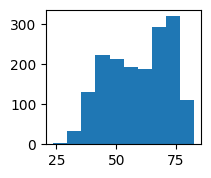
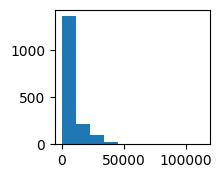

In [76]:
import rundown # let me know if this breaks!
gapminder = px.data.gapminder()
gapminder.rundown()

# EXERCISE

Plot the GDP Per Capita (`gdpPercap`) vs. Life Expectancy for countries over time. Visually represent Continent and Population (`pop`) 

In [82]:
# A Solution
px.scatter(
    gapminder,
    x="gdpPercap",
    y="lifeExp",
    color="continent",
    size="pop",
    animation_frame="year",
    animation_group="country",
    hover_name="country",
    size_max=55,
    log_x=True,
    range_x=[100,100000],
    range_y=[25,90],
    title = "Gapminder: Global State"
)

In [ ]:
# Your Solution

px.scatter(
    gapminder,
    ...
)